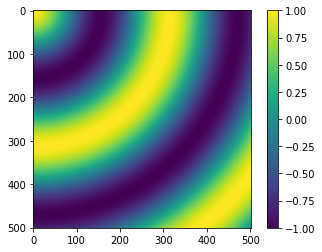

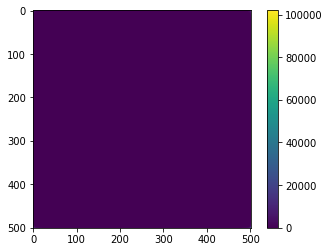

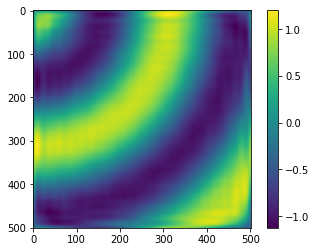

In [180]:
#Trevor Taylor

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

#Downloading data to use fft and ifft on
#Original data was 3.71M
data = np.loadtxt("circular.txt",float)

#Fourier and inverse Fourier transforms
fdata = np.fft.fft2(data)
fdata[np.abs(fdata)<1000] = 0
idata = np.fft.ifft2(fdata)



#plots of origianl, fourier transform and inverse fourier transform
plt.imshow(data)
plt.colorbar()
plt.show()
plt.imshow(np.abs(fdata))
plt.colorbar()
plt.show()
plt.imshow(np.real(idata))
plt.colorbar()
plt.show()

#Redownloading data to see compression difference
df = pd.DataFrame(idata)
df.to_csv("data_size3.csv")
#The redownloaded file was 11.3M before and after the exclusion of low value coefficents 
#This indicated the downloading method had some flaw

In [159]:
print(data)
print(fdata)
print(idata)

[[ 1.          0.99980001  0.99920011 ... -0.8601554  -0.84978342
  -0.83907153]
 [ 0.99980001  0.99960003  0.99900017 ... -0.86014516 -0.84977285
  -0.83906065]
 [ 0.99920011  0.99900017  0.99840043 ... -0.86011443 -0.84974116
  -0.839028  ]
 ...
 [-0.8601554  -0.86014516 -0.86011443 ...  0.05157697  0.03744188
   0.02328514]
 [-0.84978342 -0.84977285 -0.84974116 ...  0.03744188  0.02331348
   0.00916625]
 [-0.83907153 -0.83906065 -0.839028   ...  0.02328514  0.00916625
  -0.00496866]]
[[-24019.02327344+6.82121026e-13j -15895.51524783+6.28216381e+03j
   17569.1834565 -1.12349675e+04j ...   3910.5779825 -4.19782599e+02j
   17569.1834565 +1.12349675e+04j -15895.51524783-6.28216381e+03j]
 [-15895.51524783+6.28216381e+03j  19732.83288011+1.00023483e+05j
  -26410.8121108 -1.55007710e+04j ...   3377.56732893-4.56034206e+02j
   13101.11655915-6.08243885e+01j  -2962.67421964+1.72383722e-12j]
 [ 17569.1834565 -1.12349675e+04j -26410.8121108 -1.55007710e+04j
  -15554.93233232-7.71901456e+03j ..

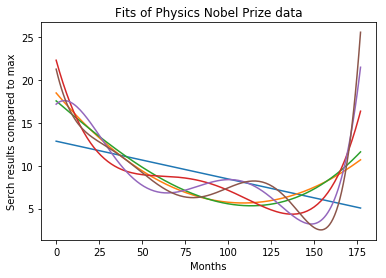

In [10]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
import numpy as np

#Data of google serch results of physics nobel prize
#The data has a highest value of 100 
#Because of this I am assuming that the data is not the number of serches but a ratio of that month's serches to the max
nobel = genfromtxt('Data_Nobel_Prize.csv', delimiter=',')

#Length of array to make sure that times array is same length
x = len(nobel)

#Array of natural numbers up to the length of the nobel array
times = np.arange(x)

#Fits
fit1 = np.polyfit(times,nobel,1,full=True)
y_p1 = np.polyval(fit1[0],times)

fit2 = np.polyfit(times,nobel,2,full=True)
y_p2 = np.polyval(fit2[0],times)

fit3 = np.polyfit(times,nobel,3,full=True)
y_p3 = np.polyval(fit3[0],times)

fit4 = np.polyfit(times,nobel,4,full=True)
y_p4 = np.polyval(fit4[0],times)

fit5 = np.polyfit(times,nobel,5,full=True)
y_p5 = np.polyval(fit5[0],times)

fit6 = np.polyfit(times,nobel,6,full=True)
y_p6 = np.polyval(fit6[0],times)

#Plot of fits
plt.plot(times,y_p1)
plt.plot(times,y_p2)
plt.plot(times,y_p3)
plt.plot(times,y_p4)
plt.plot(times,y_p5)
plt.plot(times,y_p6)
plt.title('Fits of Physics Nobel Prize data')
plt.xlabel('Months')
plt.ylabel('Serch results compared to max')
plt.plot
plt.show()

#None of the fits capture the periodicity of the data making them not very useful though they do show a gerneal trend

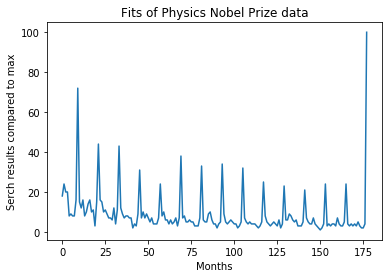

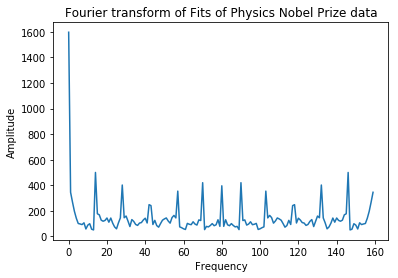

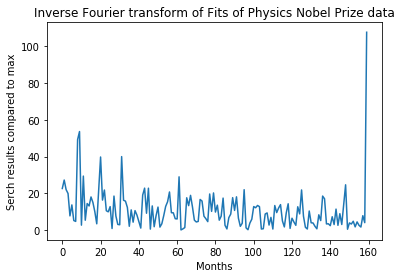

In [176]:
from numpy import genfromtxt
import matplotlib.pyplot as plt
import numpy as np

#Data of google serch results of physics nobel prize
#The data has a highest value of 100 
#Because of this I am assuming that the data is not the number of serches but a ratio of that month's serches to the max
nobel = genfromtxt('Data_Nobel_Prize.csv', delimiter=',')

#Length of array to make sure that times array is same length
x = len(nobel)

#Array of natural numbers up to the length of the nobel array
times = np.arange(x)

#Fourier and Inverse Fourier transforms
fnobel = np.fft.fft(nobel)
fnobel2 = fnobel[np.abs(fnobel)>50]
inobel = np.fft.ifft(fnobel2)

x2 = len(fnobel2)
times2 = np.arange(x2)

plt.plot(times,nobel)
plt.title('Fits of Physics Nobel Prize data')
plt.xlabel('Months')
plt.ylabel('Serch results compared to max')
plt.show()
plt.plot(times2,np.abs(fnobel2))
plt.title('Fourier transform of Fits of Physics Nobel Prize data')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()
plt.plot(times2,np.abs(inobel))
plt.title('Inverse Fourier transform of Fits of Physics Nobel Prize data')
plt.xlabel('Months')
plt.ylabel('Serch results compared to max')
plt.show()

#The Fourier Transform of the data shows that there are many equal freuqnceies that make up the data
#This is shown because even excluding data under 50 the inverse fft is very different from the original
